<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# Посмотрим на случайные строки
from random import sample
rdata = data.sample(n=10, random_state=1)
rdata.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2711,9,44.20,403.35,Female,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
4034,72,24.25,1784.5,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2243,30,91.70,2758.15,Female,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Credit card (automatic),1
4865,13,98.00,1237.85,Male,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
420,63,104.80,6597.25,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
2424,72,86.60,6350.5,Female,0,No,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
348,68,78.45,5333.35,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Electronic check,0
4089,64,90.25,5629.15,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,One year,No,Credit card (automatic),0
3244,49,20.70,1032.05,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
1309,72,24.75,1777.6,Male,0,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0


In [6]:
# Проверим, есть ли nan'ы
data = data.replace(' ', np.nan) # заменили пропусти nan'ами, потому что иначе они не распознаются isna()
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Видим, что в столбце TotalSpent есть NaN'ы, строк с ними не так много, поэтому выбросим их.

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Text(0.5, 1.0, 'TotalSpent')

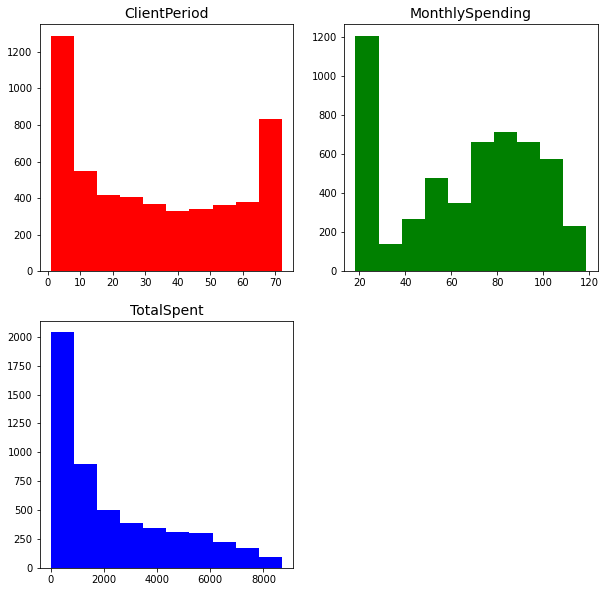

In [8]:
# гистограммы для численных признаков
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(data[num_cols[0]], color = 'r')
plt.title("ClientPeriod", fontsize = 14)

plt.subplot(2, 2, 2)
plt.hist(data[num_cols[1]], color = 'g')
plt.title("MonthlySpending", fontsize = 14)

plt.subplot(2, 2, 3)
plt.hist(pd.to_numeric((data[num_cols[2]])), color = 'b')
plt.title("TotalSpent", fontsize = 14)

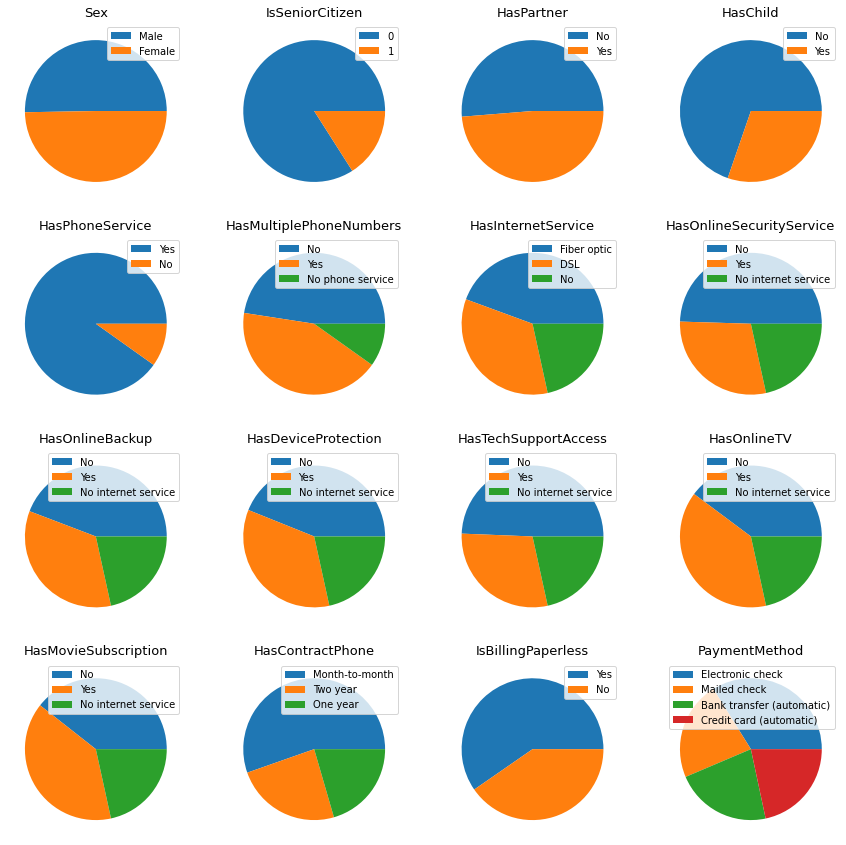

In [9]:
# диаграммы для категориальных признаков
plt.figure(figsize=(15, 15))

for i in range(len(cat_cols)):
    plt.subplot(4, 4, i + 1)
    plt.pie(data[cat_cols[i]].value_counts())
    plt.legend(data[cat_cols[i]].value_counts().keys(), loc="best")
    plt.title(cat_cols[i], fontsize = 13)

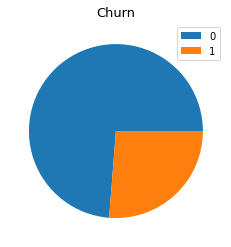

In [10]:
# распределение целевой переменной
plt.pie(data[target_col].value_counts())
plt.legend(data[target_col].value_counts().keys())
plt.title(target_col, fontsize = 13)
None

Видно, что классы несбалансированные.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [11]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

1

In [13]:
X = pd.get_dummies(data, columns=cat_cols)
X.drop(["Churn"], axis=1, inplace=True)
y = data["Churn"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2

In [16]:
model = GridSearchCV(estimator=LogisticRegression(), 
                            param_grid= {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1)

model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [17]:
print('Лучшее качество:',model.best_score_)
print('Параметры:', model.best_params_)

Лучшее качество: 0.8447373990090401
Параметры: {'C': 10}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [20]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 28 kB/s 


In [21]:
import catboost
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

1

In [22]:
X_origin = data.iloc[:,:-1]

X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [23]:
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# здесь будут оценки для разных фолдов
scores = []

for train_indices, val_indices in kf.split(X_train_origin):
    
    X_train_kf = X_train_origin[train_indices]
    y_train_kf = y_train[train_indices]
    
    X_val_kf = X_train_origin[val_indices]
    y_val_kf = y_train[val_indices]
    
    boost_model = catboost.CatBoostClassifier(cat_features=np.arange(3, 19))
    boost_model.fit(X_train_kf, y_train_kf)
    y_val_predicted = boost_model.predict_proba(X_val_kf)[:, 1]
    score = roc_auc_score(y_val_kf, y_val_predicted)
    scores.append(score)
None

Learning rate set to 0.016845
0:	learn: 0.6816215	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.6710981	total: 75.1ms	remaining: 37.5s
2:	learn: 0.6605194	total: 90.6ms	remaining: 30.1s
3:	learn: 0.6505605	total: 101ms	remaining: 25.1s
4:	learn: 0.6407633	total: 112ms	remaining: 22.4s
5:	learn: 0.6321852	total: 118ms	remaining: 19.6s
6:	learn: 0.6231745	total: 129ms	remaining: 18.4s
7:	learn: 0.6148912	total: 140ms	remaining: 17.4s
8:	learn: 0.6066281	total: 153ms	remaining: 16.8s
9:	learn: 0.5993850	total: 161ms	remaining: 16s
10:	learn: 0.5918240	total: 173ms	remaining: 15.6s
11:	learn: 0.5843957	total: 185ms	remaining: 15.3s
12:	learn: 0.5776850	total: 198ms	remaining: 15s
13:	learn: 0.5708475	total: 218ms	remaining: 15.3s
14:	learn: 0.5644648	total: 230ms	remaining: 15.1s
15:	learn: 0.5585366	total: 242ms	remaining: 14.9s
16:	learn: 0.5528204	total: 260ms	remaining: 15s
17:	learn: 0.5480173	total: 268ms	remaining: 14.6s
18:	learn: 0.5445294	total: 272ms	remaining: 14s
19:	learn: 0.539

In [24]:
print(scores)

[0.8408893843676452, 0.8430527334300919, 0.8451981648546534, 0.8376260802877479]


2

In [25]:
boosting_model = catboost.CatBoostClassifier(cat_features=np.arange(3,19), eval_metric='AUC')

boosting_model.grid_search({'n_estimators': np.array([50, 100, 200, 500, 1000]), 
                            'learning_rate': np.array([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
646:	test: 0.8671580	best: 0.8673059 (587)	total: 8.36s	remaining: 4.56s
647:	test: 0.8671511	best: 0.8673059 (587)	total: 8.37s	remaining: 4.55s
648:	test: 0.8671855	best: 0.8673059 (587)	total: 8.38s	remaining: 4.53s
649:	test: 0.8671717	best: 0.8673059 (587)	total: 8.4s	remaining: 4.52s
650:	test: 0.8671511	best: 0.8673059 (587)	total: 8.41s	remaining: 4.51s
651:	test: 0.8671373	best: 0.8673059 (587)	total: 8.43s	remaining: 4.5s
652:	test: 0.8671373	best: 0.8673059 (587)	total: 8.43s	remaining: 4.48s
653:	test: 0.8671098	best: 0.8673059 (587)	total: 8.44s	remaining: 4.47s
654:	test: 0.8671167	best: 0.8673059 (587)	total: 8.45s	remaining: 4.45s
655:	test: 0.8671305	best: 0.8673059 (587)	total: 8.46s	remaining: 4.44s
656:	test: 0.8671373	best: 0.8673059 (587)	total: 8.48s	remaining: 4.43s
657:	test: 0.8671580	best: 0.8673059 (587)	total: 8.5s	remaining: 4.42s
658:	test: 0.8671717	best: 0.8673059 (587)	total: 8.51s	rem

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [26]:
best_boosting_model = catboost.CatBoostClassifier(cat_features=np.arange(3,19), n_estimators=200, learning_rate=0.05)

best_boosting_model.fit(X_train_origin, y_train)
y_test_predicted = best_boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6599274	total: 15ms	remaining: 2.98s
1:	learn: 0.6322793	total: 28ms	remaining: 2.77s
2:	learn: 0.6085779	total: 38.3ms	remaining: 2.52s
3:	learn: 0.5856209	total: 51.5ms	remaining: 2.52s
4:	learn: 0.5664206	total: 64.6ms	remaining: 2.52s
5:	learn: 0.5512905	total: 75.3ms	remaining: 2.43s
6:	learn: 0.5368964	total: 87.1ms	remaining: 2.4s
7:	learn: 0.5244978	total: 99.2ms	remaining: 2.38s
8:	learn: 0.5130833	total: 109ms	remaining: 2.32s
9:	learn: 0.5022176	total: 124ms	remaining: 2.35s
10:	learn: 0.4915930	total: 137ms	remaining: 2.36s
11:	learn: 0.4826102	total: 152ms	remaining: 2.38s
12:	learn: 0.4752079	total: 163ms	remaining: 2.35s
13:	learn: 0.4688258	total: 176ms	remaining: 2.34s
14:	learn: 0.4631243	total: 187ms	remaining: 2.3s
15:	learn: 0.4581726	total: 201ms	remaining: 2.31s
16:	learn: 0.4545197	total: 209ms	remaining: 2.25s
17:	learn: 0.4500755	total: 226ms	remaining: 2.29s
18:	learn: 0.4456339	total: 239ms	remaining: 2.27s
19:	learn: 0.4414662	total: 253ms	remai

In [27]:
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.8414390186364709


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.8414390186364709

# Предсказания

In [28]:
best_model = best_boosting_model

In [32]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.